## Overview of the Dataset

Data Set Information: From the UCI Machine Learning Repository, this dataset can be used for regression modeling and classification tasks. The dataset includes info about the chemical properties of different types of wine and how they relate to overall quality.

Attribute Information:

Input variables (based on physicochemical tests):
1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>
Output variable (based on sensory data): <br>
12 - quality (score between 0 and 10) <br>

## Dataset: Wine Quality Data Set
Link: https://archive.ics.uci.edu/ml/datasets/wine+quality

## Step 01: Import all the required Libraries

Let's load the necessary libraries and data and start coding.
- <strong>NumPy</strong> : stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.
- <strong>Pandas</strong> : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- <strong>Sklearn</strong> : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- <strong>Pickle</strong> : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- <strong>Matplotlib</strong> : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- <strong>Seaborn</strong> : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

## Step 02: Read all the required Data
In this stage we are going to read our problem dataset and have a look on it.

In [2]:
# Loading the data in pandas dataframe
try: 
    data = pd.read_csv('Data/winequality.csv', delimiter=';')
    print("Data Reading Done Successfully....")
    
except (FileNotFoundError, IOError):
    print("Wrong File or File path")

Data Reading Done Successfully....


After we read the data, we can look at the data using:

In [3]:
# Check the first five records
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Check the last five records
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


## Step 03: Data Exploration
Now we explore the data using different techniques..

In [5]:
# Checking the rows and columns of the dataset
print(f"The dataset has {data.shape[0]} and rows and {data.shape[1]} columns.")

The dataset has 4898 and rows and 12 columns.


In [6]:
# Getting more insights of the data using .info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
# Statistic of the dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### Chcek for Missing values..

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

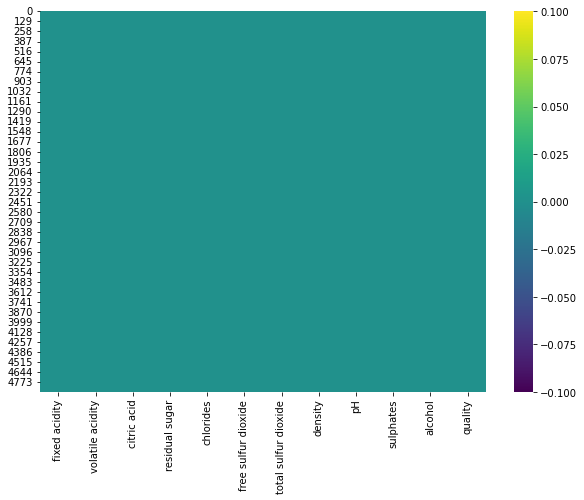

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(data=data.isnull(), cmap="viridis")
data.isnull().sum()

As we can see there is no missing value present in the dataset

#### Explore the label variable

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

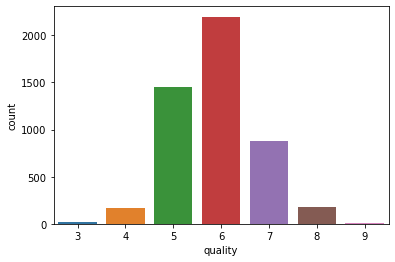

In [9]:
# Explore the label
sns.countplot(x='quality', data=data)
data['quality'].value_counts()

The most of the wine quality is 6, and then 5 and so on...

#### Exploring the Other features other than the target feature

In [10]:
data[data.columns[:-1]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


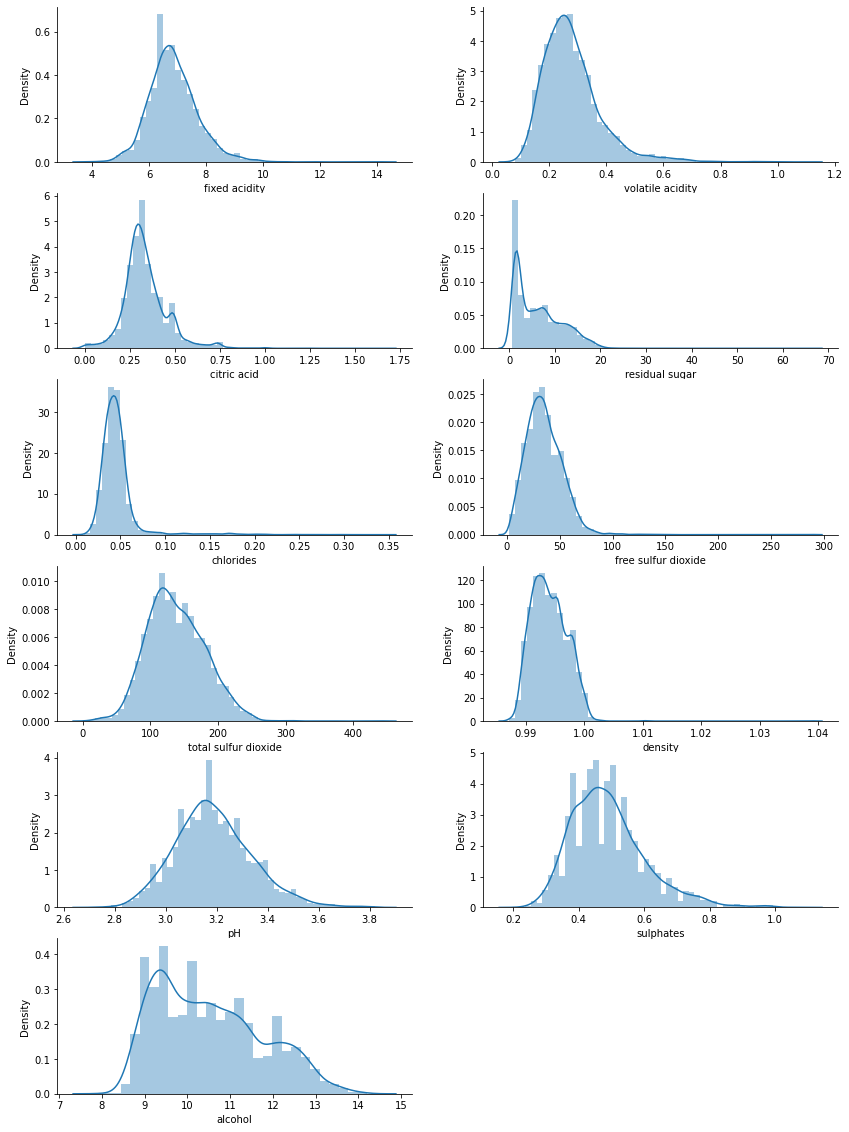

In [11]:
# Create a figure instance, and the subplots
fig = plt.figure(figsize=(14,20))

for i in range(1, len(list(data.columns[:-1]))+1):
    sns.distplot(data[data.columns[i-1]], ax=fig.add_subplot(6,2,i))
    
sns.despine()
plt.show()

Most of the data is normally distributed that is quite intutive.

<AxesSubplot:>

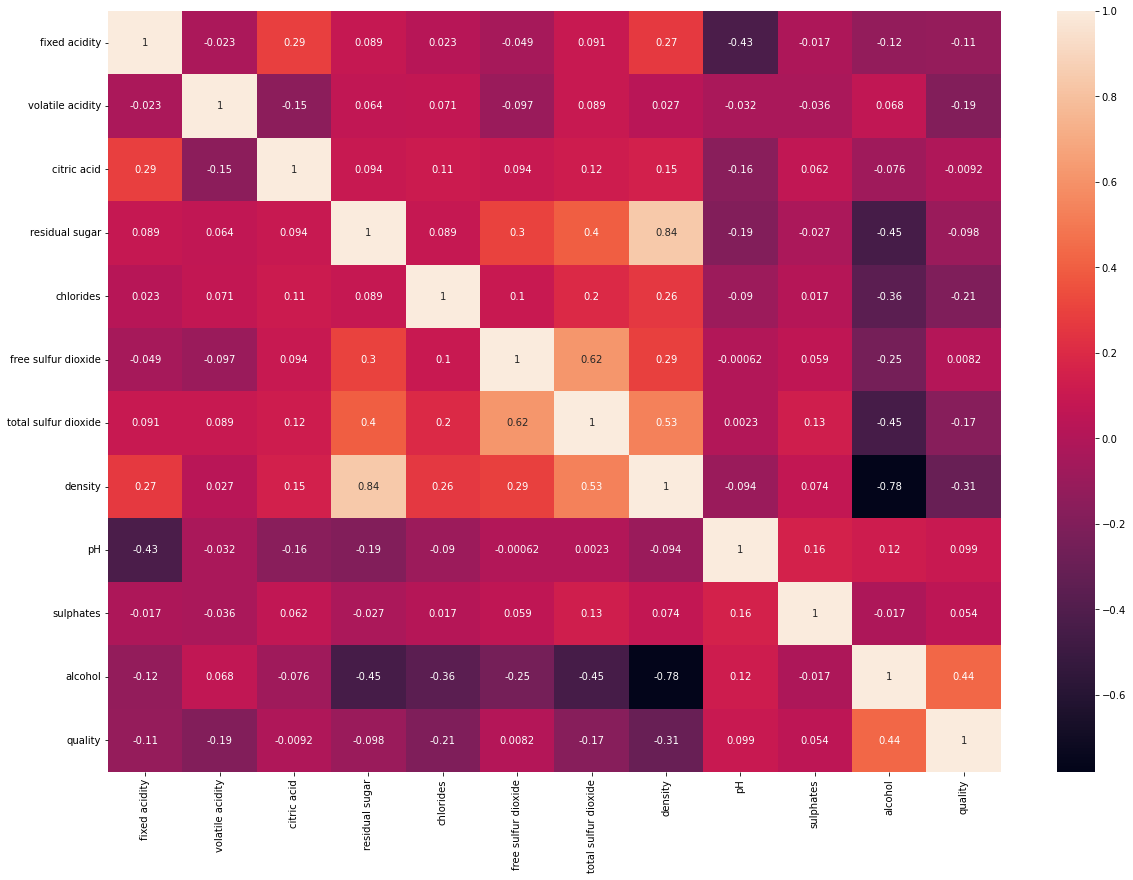

In [12]:
# Correlation Plot
plt.figure(figsize=(20,14))
corr = data.corr()
sns.heatmap(corr, annot=True)

There is no multicolineraity present in the data.

## Step 04: Data Pre-Processing
Make data ready for Machine Learning model...

In [13]:
# Separate the other features and the target fetaures
X = data.drop(columns=['quality'])
y = data['quality']

In [14]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [15]:
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [16]:
#Making binary classificaion for the label variable.
#Dividing wine as good and bad by giving the limit for the quality
y = pd.cut(y, bins=(2, 6.5, 10), labels=['Bad', 'Good'])

In [17]:
y.value_counts()

Bad     3838
Good    1060
Name: quality, dtype: int64

In [18]:
#Now lets assign a labels to our quality variable
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
pd.Series(y).value_counts()

0    3838
1    1060
dtype: int64

#### Scaling the data to the same range

In [20]:
# Make the object of the StandardScaler class
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Scaled Data
X_scaled

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

## Step 5: Split the data into train and test set
- Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on the test dataset and find out how accurate are its predictions.
- Here we are splitting the data so that the training dataset contains 80% of the data and the test dataset contains 20% of the total data.
- Here we are using the train_test_split method from the sklearn library. We'll train our model on x_train and y_train, test it on x_test and y_test.

- test_size: Here we specify the size we want for our test dataset.

- random_state: When we use a random number generator for number or sequence generation, we give a starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split().

In [22]:
# Splitting the dataset into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [23]:
#display the shapes of the x and y train and test dataset.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3281, 11) (1617, 11) (3281,) (1617,)


## Step 6: Train the Model using Random Forest Classifier

In [24]:
# Creating the instance of the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=200)

In [25]:
# Train the model
random_forest.fit(X_train, y_train)
print("Training is done successfully..")

Training is done successfully..


In [26]:
# make prediction on test data
y_pred = random_forest.predict(X_test)

In [27]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[1218,   38],
       [ 149,  212]], dtype=int64)

In [28]:
# function to print differnet performace scores
def score(y_test, y_pred):
    different_score = {
        "Accuarcy Score" : accuracy_score(y_test, y_pred),
        "Precision Score" : precision_score(y_test, y_pred, average='weighted'),
        "Recall Score" : recall_score(y_test, y_pred, average='weighted'),
        "F1 Score" : f1_score(y_test, y_pred, average='weighted')
    }
    return different_score

In [29]:
# Printing the score
score(y_test, y_pred)

{'Accuarcy Score': 0.8843537414965986,
 'Precision Score': 0.8814018283245998,
 'Recall Score': 0.8843537414965986,
 'F1 Score': 0.876296005291668}

In [30]:
# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1256
           1       0.85      0.59      0.69       361

    accuracy                           0.88      1617
   macro avg       0.87      0.78      0.81      1617
weighted avg       0.88      0.88      0.88      1617



In [31]:
# Saving the result
result = pd.DataFrame({'y_test':np.array(y_test).reshape(len(y_test)), 'y_pred':y_pred}, index=range(len(y_pred)))
result.to_csv('Wine Quality Classification model result.csv')

## Step 7: Save the model in a pickle file
As model is giving very good accuracy we'll go with it and save it to pickle file. We save our model to pickle files so that when we want to perform predictions on unseen data, we don't have to train our model again. Any object in python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream.

In [32]:
# Save the model to disk
pickle.dump(random_forest, open('Wine Quality Classification model.pickle', 'wb'))

## Summary
Now our model is ready and whenever we need to do classification, we just need load the model using pickle and can do classification.